In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

SR = 44000
SL = int((SR*0.5)//1)
T = np.linspace(0, SL/SR, SL, endpoint=False)

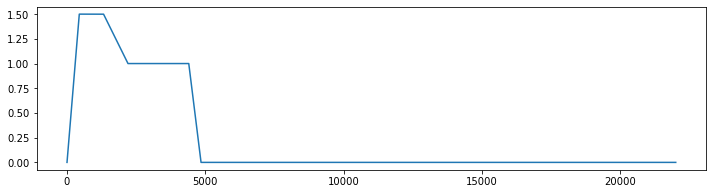

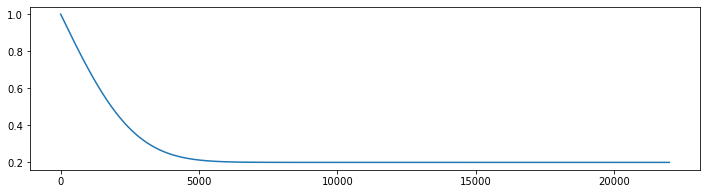

In [2]:
def AHDSR(A, H, D, S, R, P=1.2):
    A_idx, H_idx, D_idx, S_idx, R_idx = (np.cumsum([A, H, D, S, R]) * SR).astype(np.int)
    wave = np.zeros(SL)
    wave[0:A_idx] = np.linspace(0, P, A_idx, endpoint=False)
    wave[A_idx:H_idx] = np.linspace(P, P, H_idx-A_idx, endpoint=False)
    wave[H_idx:D_idx] = np.linspace(P, 1.0, D_idx-H_idx, endpoint=False)
    wave[D_idx:S_idx] = np.linspace(1.0, 1.0, S_idx-D_idx, endpoint=False)
    wave[S_idx:R_idx] = np.linspace(1.0, 0, R_idx-S_idx, endpoint=False)
    return wave

LF_gain = AHDSR(0.01, 0.02, 0.02, 0.05, 0.01, 1.5)

plt.figure(figsize=(12,3))
plt.plot(LF_gain)
plt.show()

from scipy.special import erf
LF_fm = 1.0 - 0.8*erf(15*T)

plt.figure(figsize=(12,3))
plt.plot(LF_fm)
plt.show()

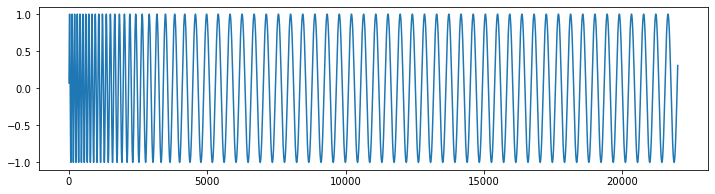

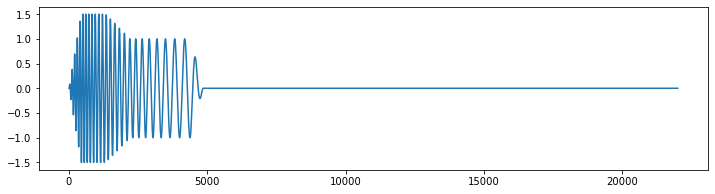

In [3]:
def SinOsc(fm):
    return np.sin(np.cumsum(2*np.pi*fm / SR))

HF_tone = SinOsc(500*LF_fm)

plt.figure(figsize=(12,3))
plt.plot(HF_tone)
plt.show()

wave = HF_tone * LF_gain

plt.figure(figsize=(12,3))
plt.plot(wave)
plt.show()

In [4]:
from scipy.io.wavfile import write as writeWAV
writeWAV("drum.wav", SR, wave)

import IPython.display as ipd
ipd.display(ipd.Audio(wave, rate=SR, autoplay=True))